# Project Title: TLC Trip Records Data Exploration 

Project Description: https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_fhv.pdf https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

# Import Modules

In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib as mpl
from credentials import *
sys.path.append(sys_path_ds)
from Queries.nyc_taxi import *
import matplotlib.pyplot as plt
from urllib.request import urlopen
from sqlalchemy import text, create_engine

# Options and Settings

In [2]:
np.set_printoptions(precision=2)
warnings.simplefilter('ignore')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
pd.options.display.max_rows = 10
pd.options.display.max_columns = 100
pd.options.display.precision = 2
plt.style.use(['ggplot', 'fivethirtyeight'])
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.autolayout'] = True
# print(plt.style.available)

# Load Image

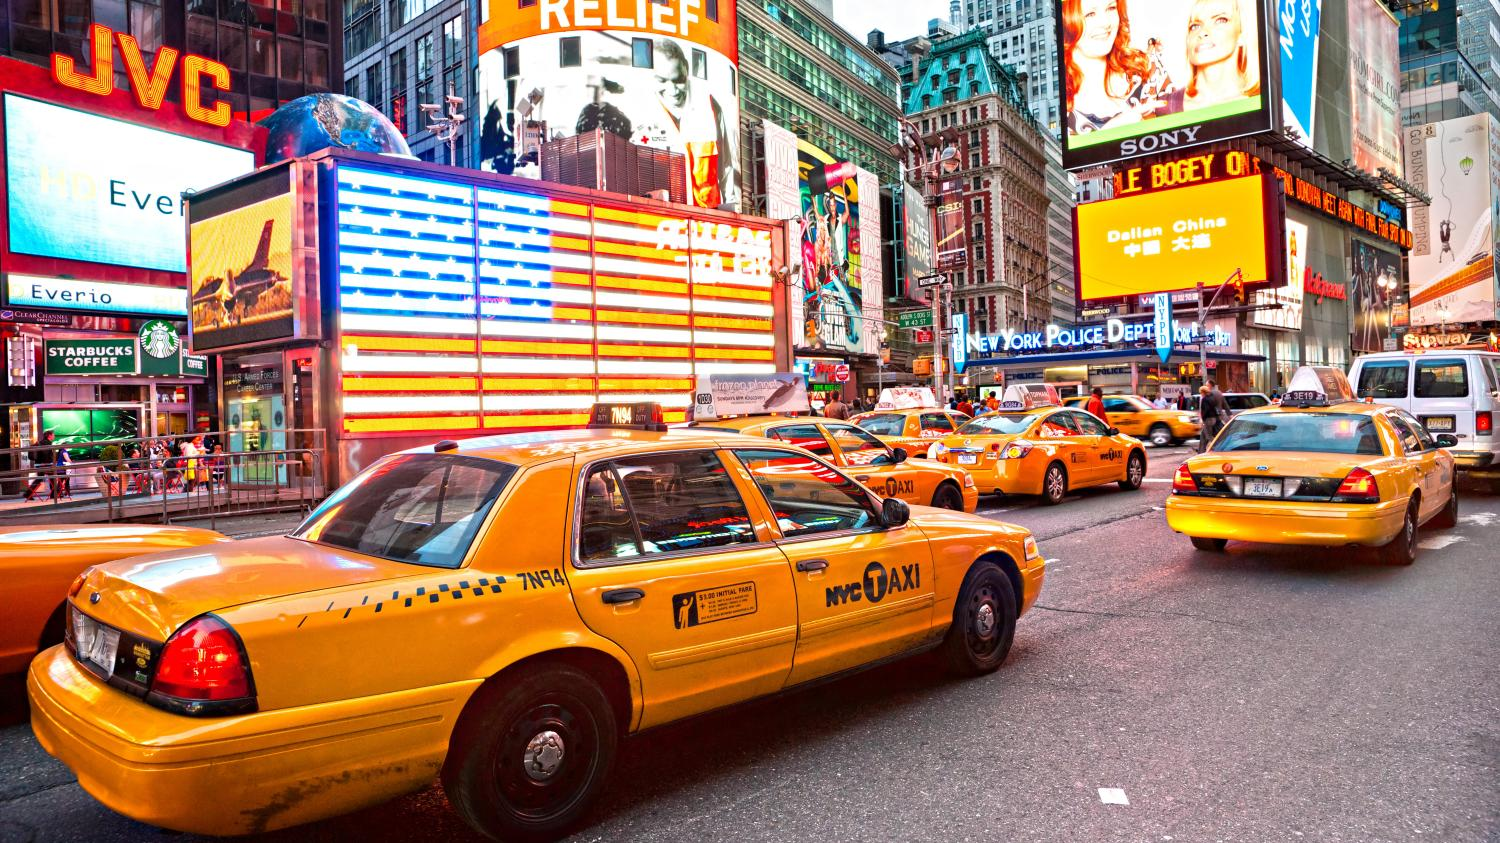

In [3]:
imgage_url = 'https://www.thetimes.co.uk/imageserver/image/%2Fmethode%2Ftimes%2Fprod%2Fweb%2Fbin%2Fcb91a076-aba1-11ec-8da7-c2b9b8c9eee5.jpg?crop=6048%2C3402%2C0%2C315&resize=1500'
Image.open(urlopen(imgage_url))

# Helper Functions

In [4]:
def get_data(query: str)->pd.DataFrame:
    '''
    Fetches data from Postgresql database and returns a pandas dataframe

    '''
    engine = create_engine(f'{driver_postgres}://{user_postgres}:{password_postgres}@{hostname_postgres}/{pg_db_yt}')
    
    with engine.connect() as conn:
        df = pd.read_sql(sql=text(query), con=conn)
        conn.close()
    return df

# Data Exploration

In [5]:
df1 = get_data(query1)

In [6]:
df1

,pickup_yr,passenger_count
0,2023.0,1.58e+07


In [7]:
df2 = get_data(query2)

In [8]:
df2.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration,duration_in_days
0,2023-02-23 14:59:05,2023-02-28 12:32:42,4 days 21:33:37,4.0
1,2023-01-16 10:20:33,2023-01-20 17:19:57,4 days 06:59:24,4.0
2,2023-01-07 13:11:57,2023-01-09 15:52:28,2 days 02:40:31,2.0
3,2023-01-11 08:34:15,2023-01-13 09:42:02,2 days 01:07:47,2.0
4,2023-02-22 11:28:46,2023-02-24 19:26:27,2 days 07:57:41,2.0
5,2023-01-26 12:25:33,2023-01-28 12:52:30,2 days 00:26:57,2.0
6,2023-02-19 10:58:06,2023-02-21 14:31:26,2 days 03:33:20,2.0
7,2023-02-12 17:04:48,2023-02-14 18:47:42,2 days 01:42:54,2.0
8,2023-02-12 17:04:48,2023-02-14 19:07:27,2 days 02:02:39,2.0
9,2023-01-05 07:21:50,2023-01-06 19:52:25,1 days 12:30:35,1.0


In [9]:
df3 = get_data(query3)

In [10]:
df3

,payment_type,total_amount
0,Credit card,449693.0
1,None,309332.0
2,Cash,229188.0
3,No charge,34216.0
4,Dispute,18526.0


In [11]:
df4 = get_data(query4)

In [12]:
df4

,ratecode_name,avg_fare_amount,total_fare_amount
0,Standard rate,16.0,174917671
1,JFK,70.0,29372591
2,Unknown,20.0,6064456
3,Negotiated fare,72.0,3857321
4,Newark,85.0,2925925
5,Nassau or Westchester,107.0,1818737
6,Unknown,34.0,1786943
7,Group ride,55.0,1427


In [13]:
df5 = get_data(query5)

In [14]:
df5

,ratecode_name,passenger_count
0,Standard rate,1.48e+07
1,JFK,6.40e+05
2,Negotiated fare,8.15e+04
3,Newark,5.53e+04
4,Unknown,5.21e+04
5,Nassau or Westchester,2.40e+04
6,Group ride,1.80e+01
